## Classwork - 4 4/20/2024

## Reddit webscrappin

In [2]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Authentication

In [3]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="xq8tk6QV4JeTwIldOa7NVw",
    client_secret="wdyfErjq7E_JDsWCHnz3Tx6iU1ESJg",
    user_agent=user_agent
)

In [4]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

## The "bitcoin" subreddit channel will be use for this project

In [5]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
93
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


## Get total comment in Subreddit

In [6]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

653


In [7]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Sale!
1,...
2,Australians laugh after banks won't give custo...
3,Happy 420
4,When exactly does the halving occur? Is there ...


In [9]:
bitcoin_df.head()

,0
0,Sale!
1,...
2,Australians laugh after banks won't give custo...
3,Happy 420
4,When exactly does the halving occur? Is there ...


In [10]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [11]:
bitcoin_df.columns = ['Titles']

In [12]:
bitcoin_df.head()

,Titles
0,Sale!
1,...
2,Australians laugh after banks won't give custo...
3,Happy 420
4,When exactly does the halving occur? Is there ...


In [13]:
bitcoin_df.Titles.duplicated().sum() 

0

In [14]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()


,Titles
0,Sale!
1,...
2,Australians laugh after banks won't give custo...
3,Happy 420
4,When exactly does the halving occur? Is there ...


In [15]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Sale!
1,...
2,Australians laugh after banks won't give custo...
3,Happy 420
4,When exactly does the halving occur? Is there ...


In [16]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [18]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Sale!,0.000000,0.000000
1,...,0.000000,0.000000
2,Australians laugh after banks won't give custo...,0.100000,0.300000
3,Happy 420,1.000000,0.800000
4,When exactly does the halving occur? Is there ...,0.352273,0.193182


In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Sale!,0.000000,0.000000,Neutral
1,...,0.000000,0.000000,Neutral
2,Australians laugh after banks won't give custo...,0.100000,0.300000,Positive
3,Happy 420,1.000000,0.800000,Positive
4,When exactly does the halving occur? Is there ...,0.352273,0.193182,Positive
5,Store (metal) seed phrase in home safe or bank...,0.500000,0.500000,Positive
6,Even the international mafia fund are becoming...,0.425000,0.225000,Positive
7,Halving explained,0.000000,0.000000,Neutral
8,Where are these dope pictures?,0.000000,0.000000,Neutral
9,Athletes getting paid in bitcoin thoughts,0.000000,0.000000,Neutral


## Data Visualization

In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

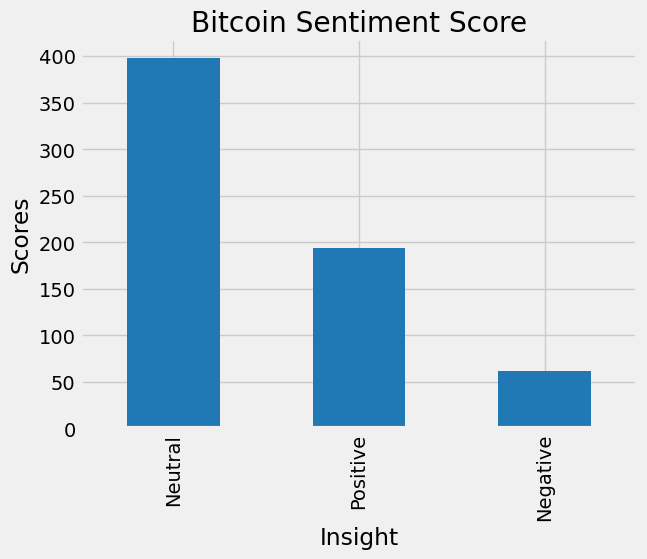

In [21]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

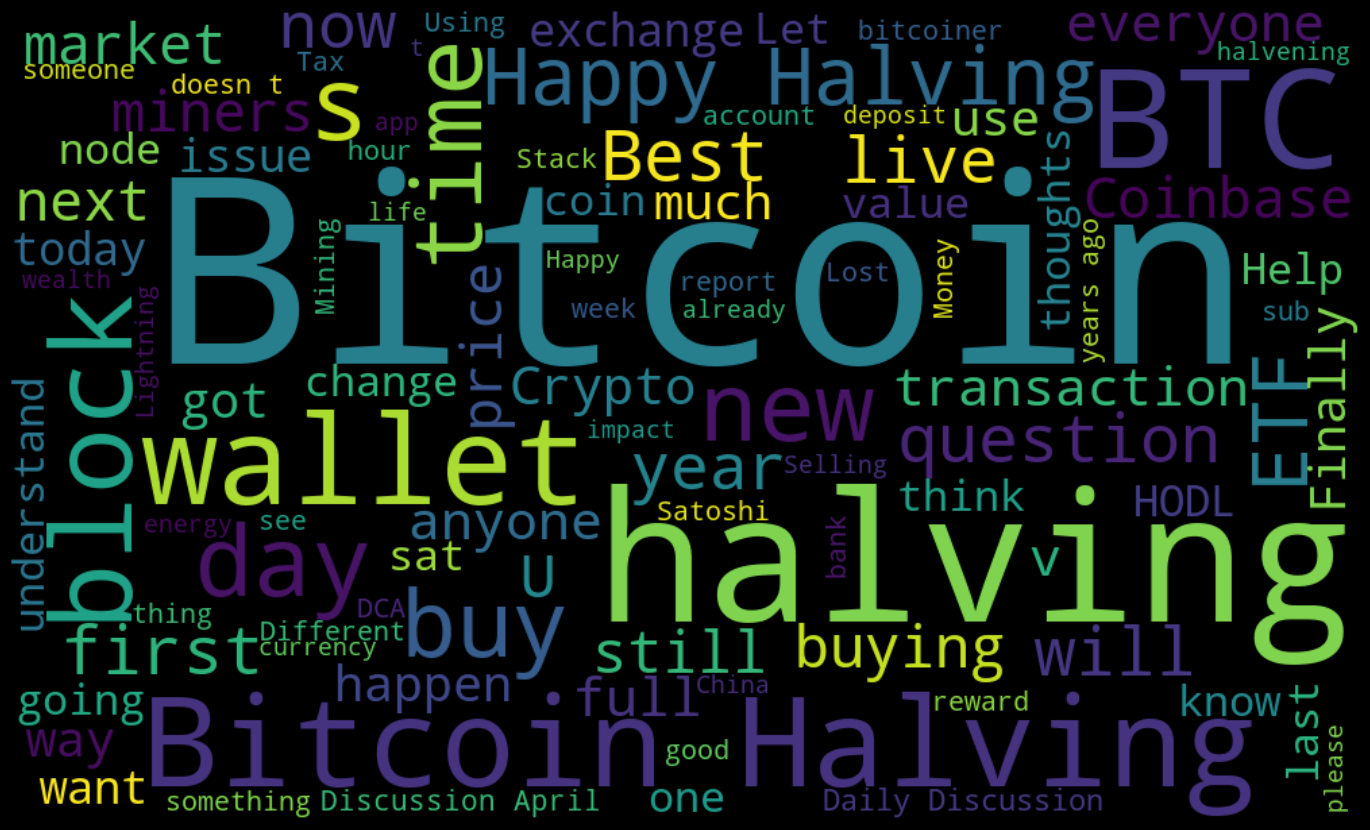

In [22]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");